In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#importing the dataset
df=pd.read_csv("data/iris_modified.csv")
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [3]:
#dropping unnamed column
df.drop(columns="Unnamed: 0",inplace=True)
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(100, 5)

#### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


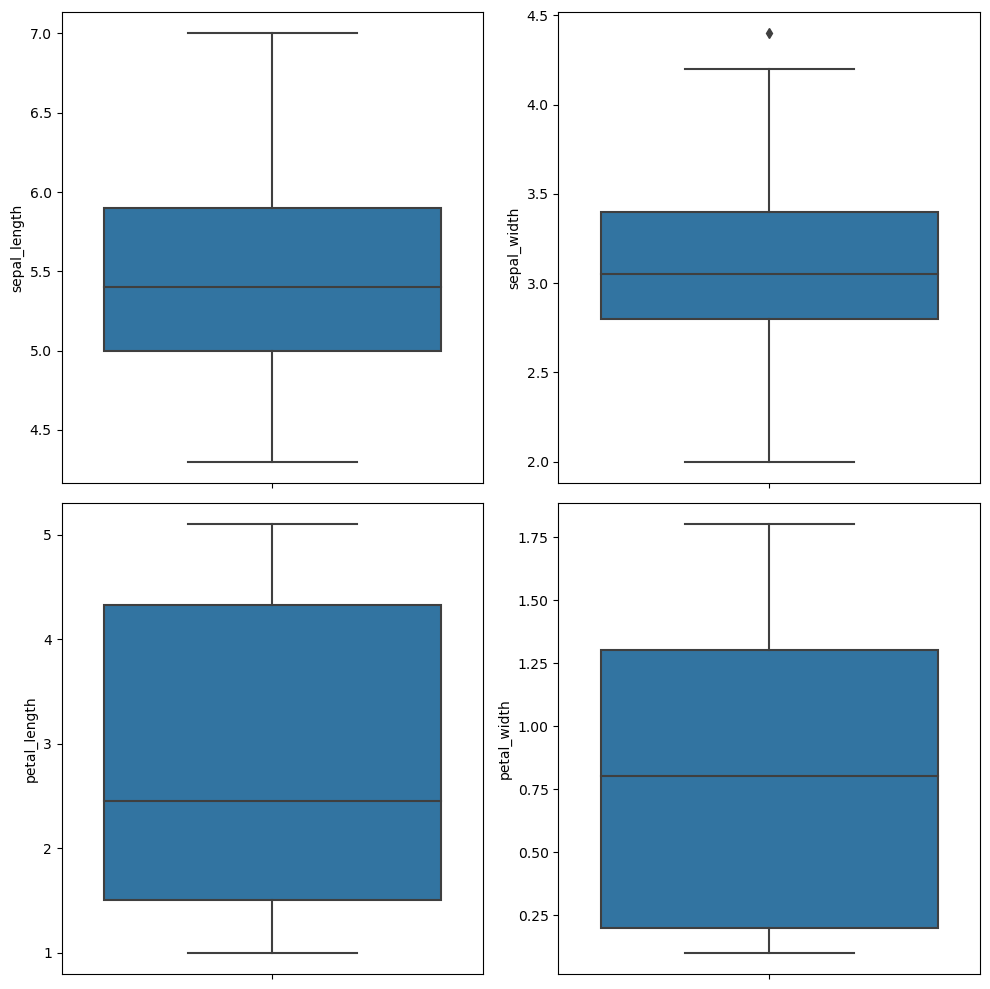

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(data=df,y="sepal_length")

plt.subplot(2,2,2)
sns.boxplot(data=df,y="sepal_width")

plt.subplot(2,2,3)
sns.boxplot(data=df,y="petal_length")

plt.subplot(2,2,4)
sns.boxplot(data=df,y="petal_width")

plt.tight_layout()
plt.show()


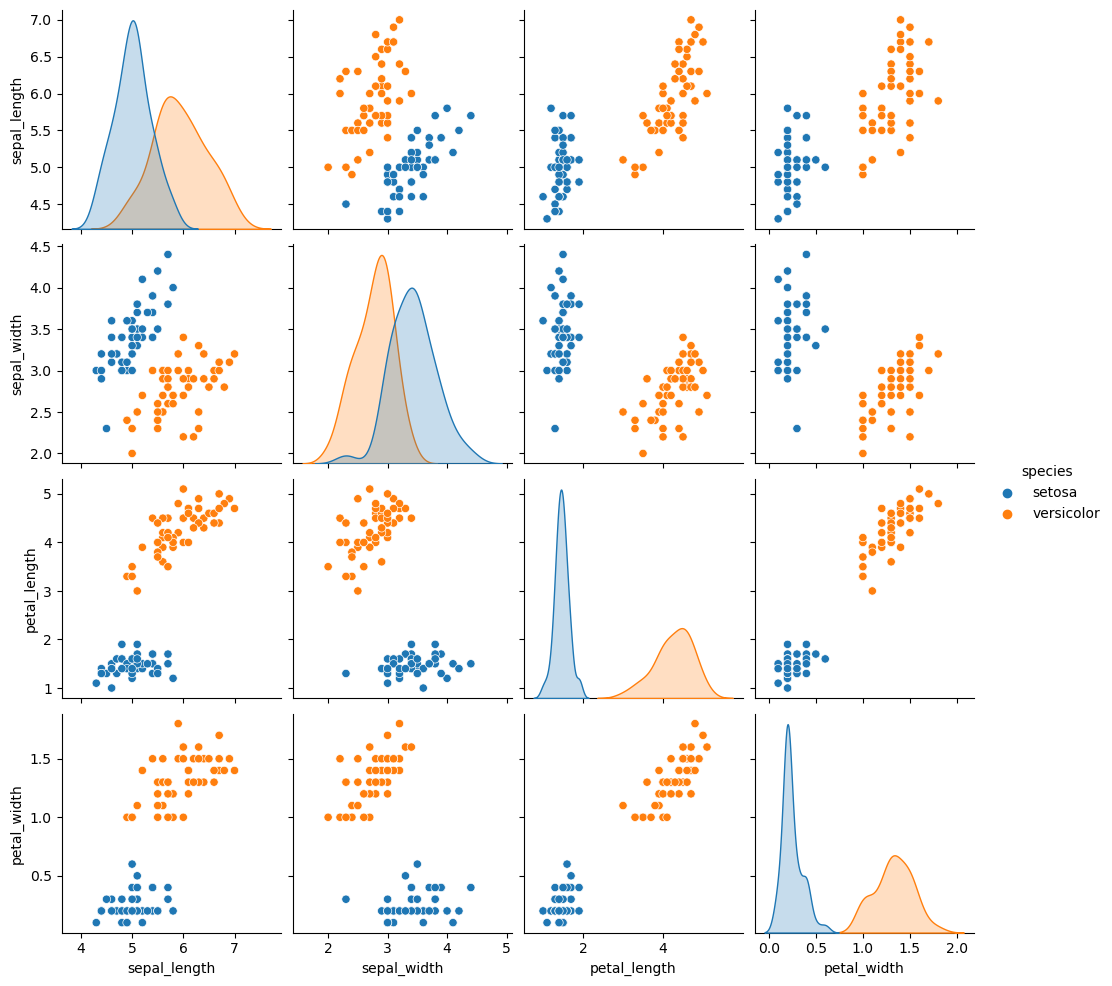

In [7]:
sns.pairplot(data=df,hue="species")

#### OBSERVATION
- From the above pairplot we can see that we need only two features to determine the species of the flower.
- If we take peta_width as one of the features and any other feature with it we can see the clear demarcation of species.
- Here we are going to take petal_length vs petal_width as the two deciding features.

### PERCEPTRONIC TRICK

In [10]:
print(list(df.index),end="")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [11]:
#creating an output column by converting the species column to binary form
output=df["species"].apply(lambda x:1 if x=="versicolor" else 0)
output

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64

In [12]:
#deciding the input features
inp=df[["petal_length","petal_width"]]

In [246]:
#initializing random weights and bias 
weight=np.random.random(2)
bias=np.random.random()
learning_rate=0.001


for i in range(175):
    indexes=list(inp.index)
    
    #randomly selecting a datapoint
    indx=np.random.choice(indexes)
    input_vector=inp.iloc[indx].values
    
    
    #finding dot product of weights with input vector
    wtx=np.dot(weight.T,input_vector)+bias
    
    if wtx>0 and output[indx]==0:
        weight=weight-(learning_rate*input_vector)
    elif wtx<0 and output[indx]==1: 
        weight=weight+(learning_rate*input_vector)  

In [247]:
weight

array([0.11233144, 0.32943317])

In [249]:
bias

0.4823717786636019

In [251]:
print(f'the optimal value for weights is : {weight} and the optimal value for bias is : {bias}') 

the optimal value for weights is : [0.11233144 0.32943317] and the optimal value for bias is : 0.4823717786636019


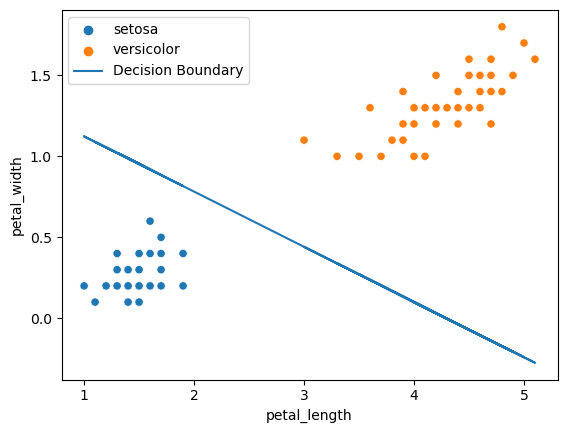

In [248]:
x_1 =df["petal_length"]
y_1=-((df["petal_length"]*weight[0])-bias)/weight[1]
x=x_1.values 
y=y_1.values
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species")
plt.plot(x, y, label='Decision Boundary')
plt.legend()
